In [8]:
from utils import *

import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd 
import datetime

In [5]:
# import data/jfk csv
data_path_jfk = 'data/jfk/jfk_terminal_8_2022.csv'
df_jfk = clean_data(data_path_jfk)
df_jfk.head()

,FlightDate,HourRange,AirportCode,TotalPassengerCount,AverageWait,BoothsUsed,FlightCount
0,2022-01-01,0500 - 0600,JFK,86,36,10,1
1,2022-01-01,0600 - 0700,JFK,489,14,17,2
2,2022-01-01,0700 - 0800,JFK,803,19,16,4
3,2022-01-01,0800 - 0900,JFK,309,27,12,1
4,2022-01-01,1100 - 1200,JFK,189,17,10,1


In [6]:
def_jfk_avg_hour = average_by_hour(df_jfk)
def_jfk_avg_hour.head()


    HourRange  TotalPassengerCount  AverageWait  BoothsUsed
0          24            13.000000     2.000000    1.000000
1           8            98.920000    12.380000    3.940000
2           9           220.730263    16.973684    4.065789
3          10           139.568421    16.410526    4.063158
4          11           124.333333    12.333333    4.252525
5          12           123.846154    13.115385    4.115385
6          13            88.428571    10.571429    2.714286
7          14           166.400000     5.500000    4.100000
8          15            64.210526     9.105263    3.526316
9          16           110.198473     6.488550    4.335878
10         17           145.828571     9.771429    4.028571
11         18           175.316832     6.445545    4.108911
12         19           265.685714    12.835714    4.107143
13         20           186.075949     9.683544    4.000000
14         21           160.140845    11.014085    3.943662
15         22            91.888889     5

HourRange  TotalPassengerCount  AverageWait  BoothsUsed
0  0000 - 0100           116.400000    11.700000    8.000000
1  0100 - 0200            12.000000     8.000000    1.000000
2  0200 - 0300            12.000000     1.000000    1.000000
3  0300 - 0400             8.000000     5.000000    1.000000
4  0500 - 0600           337.065517    27.575862   14.213793

In [15]:
# transform FlightDate to datetime
df_jfk['FlightDate'] = pd.to_datetime(df_jfk['FlightDate'])

# convert HourRange to Hour
df_jfk['Hour'] = df_jfk['HourRange'].str.split('-').str[0].str.strip()
df_jfk['Hour'] = (df_jfk['Hour'].astype(int)/100).astype(int)

# WeekDay column
df_jfk['WeekDay'] = df_jfk['FlightDate'].dt.day_name()

# Month column
df_jfk['Month'] = df_jfk['FlightDate'].dt.month_name()

df_jfk

,FlightDate,HourRange,AirportCode,TotalPassengerCount,AverageWait,BoothsUsed,FlightCount,Hour,WeekDay,Month
0,2022-01-01,0500 - 0600,JFK,86,36,10,1,5,Saturday,January
1,2022-01-01,0600 - 0700,JFK,489,14,17,2,6,Saturday,January
2,2022-01-01,0700 - 0800,JFK,803,19,16,4,7,Saturday,January
3,2022-01-01,0800 - 0900,JFK,309,27,12,1,8,Saturday,January
4,2022-01-01,1100 - 1200,JFK,189,17,10,1,11,Saturday,January
...,...,...,...,...,...,...,...,...,...,...
5137,2022-12-31,1800 - 1900,JFK,308,17,12,1,18,Saturday,December
5138,2022-12-31,1900 - 2000,JFK,913,39,14,4,19,Saturday,December
5139,2022-12-31,2000 - 2100,JFK,738,37,14,4,20,Saturday,December
5140,2022-12-31,2100 - 2200,JFK,392,20,10,2,21,Saturday,December


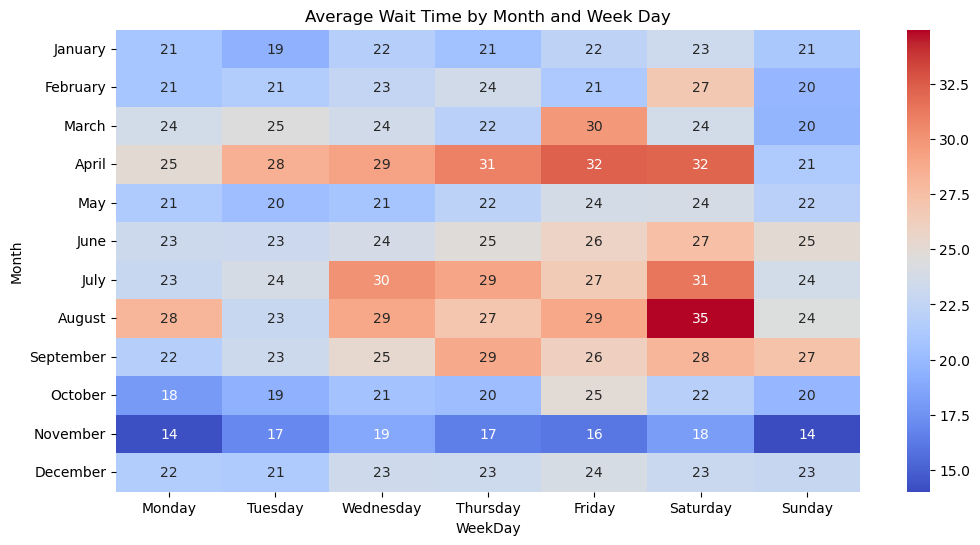

In [22]:
# Average of wait time by month and week day
df_month_day = df_jfk.groupby(['Month', 'WeekDay'])['AverageWait'].mean()

# Heatmap of the average wait time by month and week day
df_month_day = df_month_day.reset_index()
df_month_day = df_month_day.pivot(index='Month', columns='WeekDay', values='AverageWait')
# Dictionary for the order of the week days
week_day_order = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
# Dictionary for the order of the months
month_order = {'January': 0, 'February': 1, 'March': 2, 'April': 3, 'May': 4, 'June': 5, 'July': 6, 'August': 7, 'September': 8, 'October': 9, 'November': 10, 'December': 11}
# Apply the order to the columns and index
df_month_day = df_month_day[[day for day in week_day_order.keys()]]
df_month_day = df_month_day.loc[[month for month in month_order.keys()]]
# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_month_day, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Average Wait Time by Month and Week Day')
plt.show()


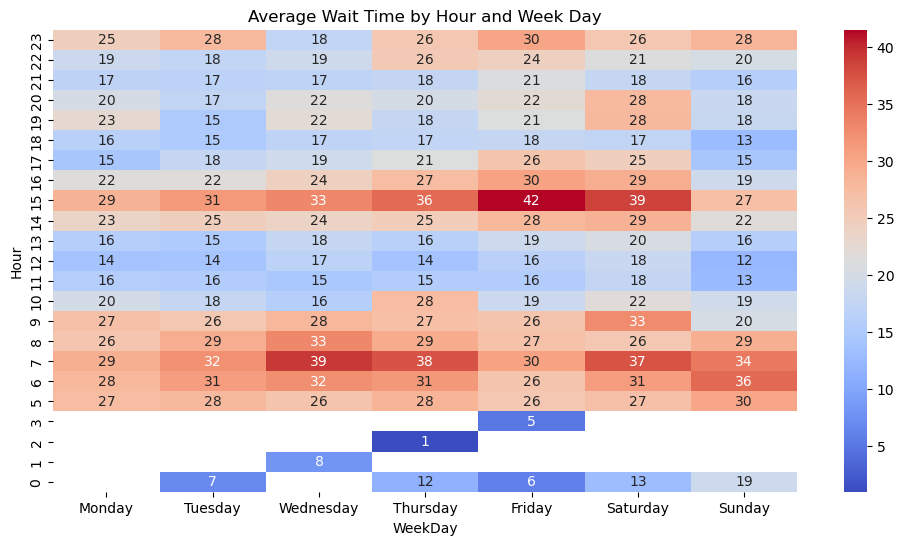

In [ ]:
# Average of wait time by hour and week day
df_hour_day = df_jfk.groupby(['Hour', 'WeekDay'])['AverageWait'].mean()
# Heatmap of the average wait time by hour and week day
df_hour_day = df_hour_day.reset_index()
df_hour_day = df_hour_day.pivot(index='Hour', columns='WeekDay', values='AverageWait')
# Apply the order to the columns
df_hour_day = df_hour_day[[day for day in week_day_order.keys()]]
# Reverse the order of the hours
df_hour_day = df_hour_day.loc[df_hour_day.index[::-1]]
# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_hour_day, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Average Wait Time by Hour and Week Day')
plt.show()


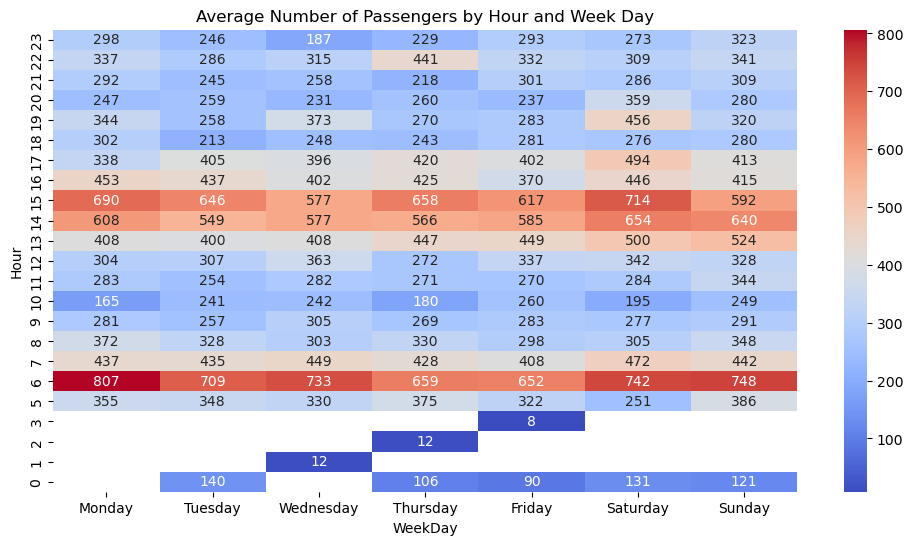

In [25]:
# average number of passengers buy hour and week day
df_hour_day_passengers = df_jfk.groupby(['Hour', 'WeekDay'])['TotalPassengerCount'].mean()
# Heatmap of the average number of passengers by hour and week day
df_hour_day_passengers = df_hour_day_passengers.reset_index()
df_hour_day_passengers = df_hour_day_passengers.pivot(index='Hour', columns='WeekDay', values='TotalPassengerCount')
# Apply the order to the columns
df_hour_day_passengers = df_hour_day_passengers[[day for day in week_day_order.keys()]]
# Reverse the order of the hours
df_hour_day_passengers = df_hour_day_passengers.loc[df_hour_day_passengers.index[::-1]]
# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_hour_day_passengers, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Average Number of Passengers by Hour and Week Day')
plt.show()


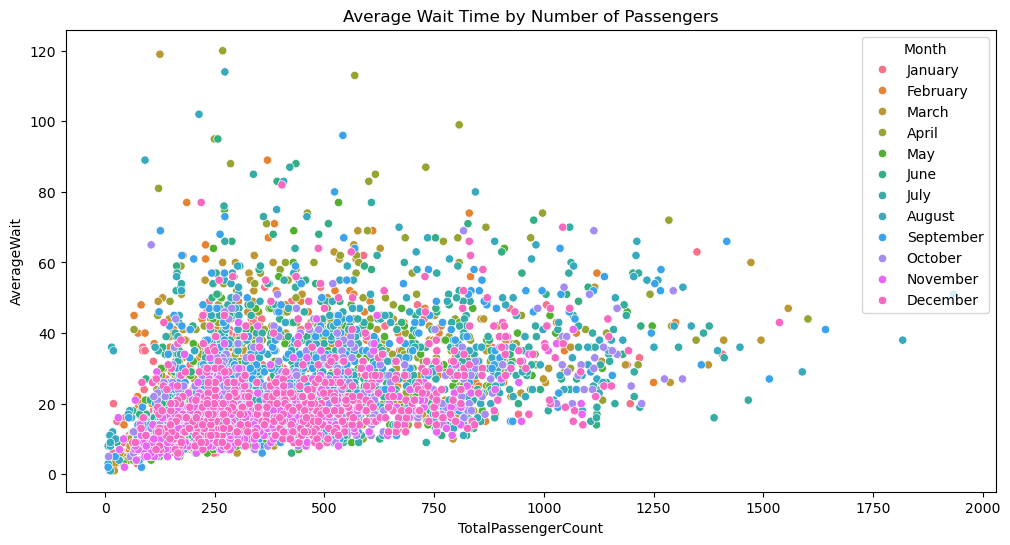

In [28]:
# Sactter plot of the average wait time by the number of passengers
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_jfk, x='TotalPassengerCount', y='AverageWait', hue='Month')
plt.title('Average Wait Time by Number of Passengers')
plt.show()


In [35]:
df_jfk['BoothsUsed'].describe()

count    5142.000000
mean       12.932128
std         3.887028
min         1.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        26.000000
Name: BoothsUsed, dtype: float64

Text(0.5, 1.0, 'Average Service Rate by Hour and Week Day')

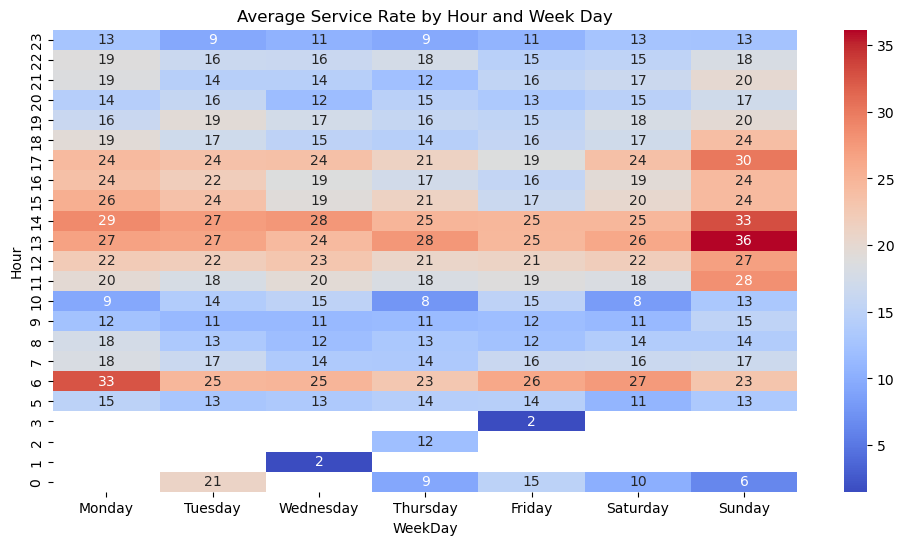

In [33]:
# Lets estimate the number of passengers that can be processed by the booths
df_jfk['ServiceRate'] = df_jfk['TotalPassengerCount'] / df_jfk['AverageWait']

# Average of the service rate by hour and week day
df_hour_day_service = df_jfk.groupby(['Hour', 'WeekDay'])['ServiceRate'].mean()
# Heatmap of the average service rate by hour and week day
df_hour_day_service = df_hour_day_service.reset_index()
df_hour_day_service = df_hour_day_service.pivot(index='Hour', columns='WeekDay', values='ServiceRate')
# Apply the order to the columns
df_hour_day_service = df_hour_day_service[[day for day in week_day_order.keys()]]
# Reverse the order of the hours
df_hour_day_service = df_hour_day_service.loc[df_hour_day_service.index[::-1]]
# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_hour_day_service, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Average Service Rate by Hour and Week Day')

